In [39]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [40]:
# reading the file
dataset = pd.read_csv('/Users/sanik/OneDrive/Desktop/Sanika/machlearning/placement-pred/data.csv')
dataset


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,CGPA,degree_t,workex,etest_p,specialisation,Masters,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed
3,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed
4,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,199,F,67.00,Central,70.00,Central,Commerce,65.00,Others,No,88.00,Mkt&HR,71.96,Not Placed
211,202,M,54.20,Central,63.00,Others,Science,58.00,Comm&Mgmt,No,79.00,Mkt&HR,58.44,Not Placed
212,207,M,41.00,Central,42.00,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed
213,209,F,43.00,Central,60.00,Others,Science,65.00,Comm&Mgmt,No,92.66,Mkt&HR,62.92,Not Placed


In [41]:
# dropping the serial no 
dataset = dataset.drop('sl_no', axis=1)

In [42]:
# catgorising col for further labelling
dataset["gender"] = dataset["gender"].astype('category')
dataset["ssc_b"] = dataset["ssc_b"].astype('category')
dataset["hsc_b"] = dataset["hsc_b"].astype('category')
dataset["degree_t"] = dataset["degree_t"].astype('category')
dataset["workex"] = dataset["workex"].astype('category')
dataset["specialisation"] = dataset["specialisation"].astype('category')
dataset["status"] = dataset["status"].astype('category')
dataset["hsc_s"] = dataset["hsc_s"].astype('category')
dataset.dtypes


gender            category
ssc_p              float64
ssc_b             category
hsc_p              float64
hsc_b             category
hsc_s             category
CGPA               float64
degree_t          category
workex            category
etest_p            float64
specialisation    category
Masters            float64
status            category
dtype: object

In [43]:
# labelling the columns
dataset["gender"] = dataset["gender"].cat.codes
dataset["ssc_b"] = dataset["ssc_b"].cat.codes
dataset["hsc_b"] = dataset["hsc_b"].cat.codes
dataset["degree_t"] = dataset["degree_t"].cat.codes
dataset["workex"] = dataset["workex"].cat.codes
dataset["specialisation"] = dataset["specialisation"].cat.codes
dataset["status"] = dataset["status"].cat.codes
dataset["hsc_s"] = dataset["hsc_s"].cat.codes

print(dataset)

     gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s   CGPA  degree_t  workex  \
0         1  67.00      1  91.00      1      1  58.00         2       0   
1         1  79.33      0  78.33      1      2  77.48         2       1   
2         1  65.00      0  68.00      0      0  64.00         0       0   
3         1  85.80      0  73.60      0      1  73.30         0       0   
4         1  82.00      0  64.00      0      2  66.00         2       1   
..      ...    ...    ...    ...    ...    ...    ...       ...     ...   
210       0  67.00      0  70.00      0      1  65.00         1       0   
211       1  54.20      0  63.00      1      2  58.00         0       0   
212       1  41.00      0  42.00      0      2  60.00         0       0   
213       0  43.00      0  60.00      1      2  65.00         0       0   
214       1  62.00      0  58.00      1      2  53.00         0       0   

     etest_p  specialisation  Masters  status  
0      55.00               1    58.80       1  
1  

In [44]:
# selecting the features and labels
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

# display dependent variables
Y


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [45]:
# dividing the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# display dataset
dataset.head()


,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,CGPA,degree_t,workex,etest_p,specialisation,Masters,status
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1
4,1,82.00,0,64.00,0,2,66.00,2,1,67.0,0,62.14,1


In [46]:
# creating a classifier using sklearn
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000).fit(X_train, Y_train)
# printing the acc
clf.score(X_test, Y_test)


0.8372093023255814

In [47]:
# predicting for random value
clf.predict([[0, 87, 0, 95, 0, 2, 78, 2, 0, 0, 1, 0]])


array([1], dtype=int8)

In [48]:
# creating a Y_pred for test data cm
Y_pred = clf.predict(X_test)

# display predicted values
Y_pred


array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0],
      dtype=int8)

In [49]:
# evaluation of the classifier
from sklearn.metrics import confusion_matrix, accuracy_score

# display confusion matrix
print(confusion_matrix(Y_test, Y_pred))

# display accuracy
print(accuracy_score(Y_test, Y_pred))


[[15  4]
 [ 3 21]]
0.8372093023255814


In [50]:
import seaborn as sns

In [51]:
sns.set(style='whitegrid')

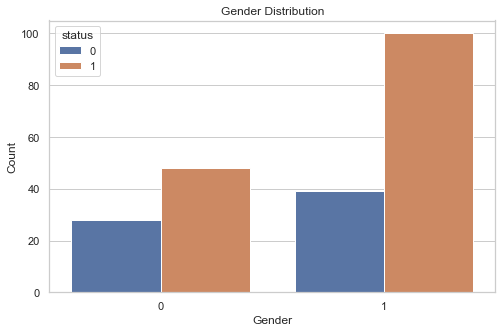

In [52]:
#gender countplot
plt.figure(figsize=(8, 5))
sns.countplot(data=dataset, x='gender', hue='status')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()